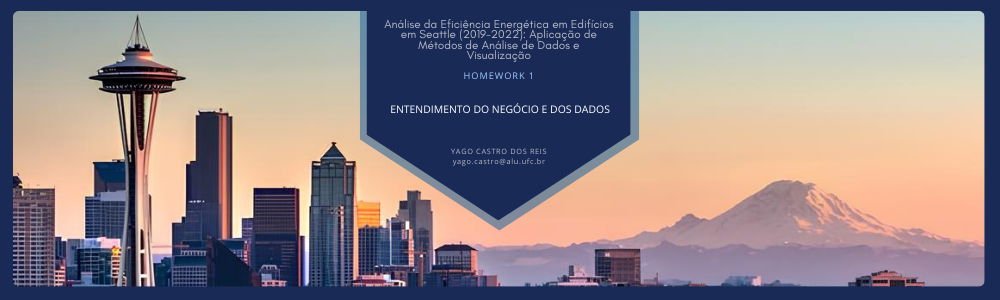

# Imports

In [1]:
from IPython.display import display, Markdown, Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import inflection 
import pathlib

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## Page_Formatting

In [2]:
from IPython.core.display import HTML

# Código de Cores ANSI
azul = "\033[38;2;10;31;68m"
verde = "\033[38;5;82m"
laranja = "\033[38;5;208m"
reset = '\033[0m'

HTML('''
<style>
    /* Aplicar fonte monoespaçada a todo o notebook */
    body, div.text_cell_render, div.code_cell pre, h1, h2, h3, h4, p {
        font-family: "Courier New", Consolas, Monaco, monospace; /* Fonte monoespaçada */
    }
    
    /* Estilo para h1 */
    h3{ 
        color: #0a1f44;            /* Cor do texto (azul marinho) */
        background-color: #dcdde1; /* Fundo azul escuro (cinza mais escuro) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h2 */
    h1{
        color: #dcdde1;            /* Cor do texto (cinza claro) */
        background-color: #0a1f44; /* Fundo azul escuro (azul marinho) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h3 */
    h2{
        color:#dcdde1;            /* Cor do texto (azul mais claro) */
        background-color: #40739e; /* Fundo azul escuro (cinza mais escuro) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h4 e h5 */
    h4, h5 {
        background-color:#40739e;  /* Fundo azul marinho */
        color: white;               /* Texto branco */
        border-radius: 8px;         /* Bordas arredondadas */
        padding: 10px;
    }
</style>
''')


## 0.2 Data_Collection

In [3]:
# Caminho onde estão os arquivos dos dados:
data_path = pathlib.Path(r'C:/Users/Yago/Desktop/GitHubLocal/UFC/ComputationalIntelligence/HW1/2.data/')

# Criando uma lista para armazenar os DataFrames temporários
dataframes = []

# Realizando um loop para percorrer cada arquivo presente em 'data_path' e adicioná-lo à lista
for arquivo in data_path.iterdir():
    if arquivo.suffix == '.csv':  
        df = pd.read_csv(arquivo)
        dataframes.append(df)

# Concatenando todos os DataFrames em um único DataFrame
df_raw_seattle = pd.concat(dataframes, ignore_index=True)

# Exibindo informações sobre o DataFrame final
print(df_raw_seattle.info())
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    14525 non-null  int64  
 1   DataYear                         14525 non-null  int64  
 2   BuildingName                     14525 non-null  object 
 3   BuildingType                     14525 non-null  object 
 4   TaxParcelIdentificationNumber    14525 non-null  object 
 5   Address                          14525 non-null  object 
 6   City                             14523 non-null  object 
 7   State                            14523 non-null  object 
 8   ZipCode                          14414 non-null  float64
 9   Latitude                         14521 non-null  float64
 10  Longitude                        14521 non-null  float64
 11  Neighborhood                     14518 non-null  object 
 12  CouncilDistrictCod

In [4]:
# tamanho inicial da base de dados (sem tratamentos)
df_raw_seattle.shape

(14525, 43)

In [5]:
# visualização dos primeiros registros da base de dados
df_raw_seattle.head()

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,PrimaryPropertyType,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),EPAPropertyType,ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,NumberofBuildings
0,1,2019,MAYFLOWER PARK HOTEL,NonResidential,0659000030,405 OLIVE WAY,SEATTLE,WA,98101.0,47.61220,-122.33799,DOWNTOWN,1.0,1927,12,88434,88434,0,Hotel,62.0,83.3,83.1,7363218.0,7351864.0,167.6,167.6,Hotel,88434.0,NaN,NaN,NaN,NaN,1134817.0,2159078.0,13208.0,Hotel,Compliant,No Issue,3871996.0,1320791.0,208.8,2.4,NaN
1,2,2019,PARAMOUNT HOTEL,NonResidential,0659000220,724 PINE ST,SEATTLE,WA,98101.0,47.61317,-122.33393,DOWNTOWN,1.0,1996,11,103566,88502,15064,Hotel,70.0,90.9,90.5,8040648.0,8006404.0,153.7,153.3,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,863688.0,0.0,50595.0,Hotel,Compliant,No Issue,2946902.0,5059502.0,286.9,3.2,NaN
2,3,2019,WESTIN HOTEL (Parent Building),NonResidential,0659000475,1900 5TH AVE,SEATTLE,WA,98101.0,47.61367,-122.33822,DOWNTOWN,1.0,1969,41,956110,759392,196718,Hotel,64.0,90.4,90.0,68355568.0,68103264.0,201.5,201.1,Hotel,756493.0,Parking,138635.0,Swimming Pool,0.0,12917890.0,22601024.0,14264.0,Hotel,Compliant,No Issue,44075841.0,1426400.0,1549.0,2.0,NaN
3,5,2019,HOTEL MAX,NonResidential,0659000640,620 STEWART ST,SEATTLE,WA,98101.0,47.61412,-122.33664,DOWNTOWN,1.0,1926,10,61320,61320,0,Hotel,58.0,103.5,103.0,6346838.0,6319004.0,177.5,176.3,Hotel,61320.0,NaN,NaN,NaN,NaN,645119.0,2104444.0,20134.0,Hotel,Compliant,No Issue,2201145.0,2013415.0,232.4,3.8,NaN
4,8,2019,WARWICK SEATTLE HOTEL,NonResidential,0659000970,401 LENORA ST,SEATTLE,WA,98121.0,47.61375,-122.34047,DOWNTOWN,1.0,1980,18,175580,113580,62000,Hotel,63.0,128.6,128.6,15875107.0,15875107.0,212.2,212.2,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,1595784.0,0.0,104303.0,Hotel,Compliant,No Issue,5444815.0,10430292.0,587.5,5.2,NaN


# 1. Entendimento do Negócio 

A Seattle Energy Benchmarking Law é uma legislação municipal de Seattle (Seattle Municipal Code 22.920) que regula o monitoramento e a transparência do consumo de energia em edifícios. O objetivo principal da lei é medir, registrar e divulgar o desempenho energético dos maiores edifícios da cidade para incentivar melhorias na eficiência energética, reduzir emissões de carbono e alinhar-se com as metas de sustentabilidade e combate às mudanças climáticas. [1]

O propósito da portaria de benchmarking de energia de edifícios de Seattle é reduzir o consumo de energia e as emissões de gases de efeito estufa, alinhando-se aos objetivos climáticos da cidade, que visam alcançar emissões líquidas zero até 2050. Através de relatórios anuais e divulgação do desempenho dos edifícios, o programa permite que proprietários e ocupantes identifiquem ineficiências e oportunidades de economia de energia. Além disso, incentiva o mercado a valorizar e recompensar a eficiência energética, promovendo um ciclo contínuo de melhoria e uma maior demanda por edifícios sustentáveis. [2]

Quais edifícios são exigidos pela Portaria de Referência de Energia de Seattle?
Edifícios não residenciais ou multifamiliares com mais de 20.000 pés quadrados, excluindo estacionamento, e que estão localizados inteiramente dentro da cidade de Seattle. [2]

Seu edifício pode se qualificar para uma isenção de relatório se:



a) Edifícios sujeitos ao Código Residencial de Seattle, que abrange moradias unifamiliares e bifamiliares isoladas e múltiplas moradias unifamiliares (sobrados) com no máximo três andares de altura com um meio de saída separado e suas estruturas acessórias.
b) Edifícios classificados sob o atual Código de Construção de Seattle como Grupo Residencial R-3. Isso inclui todas as ocupações residenciais onde os ocupantes são principalmente permanentes por natureza, a menos que a ocupação seja classificada em R-1, R-2 ou I. De acordo com o Código de Construção de Seattle de 2012, o Grupo R-3 inclui:
- Edifícios que não contêm mais de duas unidades habitacionais
- Pensões (não transitórias) com 16 ou menos ocupantes
- Pensões (transitórias) com 10 ou menos ocupantes
- Instalações de cuidados que fornecem acomodações para cinco ou menos pessoas recebendo cuidados
- Instalações de vida coletiva (não transitórias) com 16 ou menos ocupantes
- Instalações de vida coletiva (transitórias) com 10 ou menos ocupantes
c) Edifícios usados ​​principalmente para fins de fabricação ou industriais, conforme demonstrado pelo envio de um dos seguintes:
a. Um Certificado de Ocupação válido ou licença de construção documentando que pelo menos 50% do edifício é classificado sob o Código de Construção de Seattle como Grupo Industrial F de Fábrica. Isso inclui edifícios usados ​​para operações de montagem, desmontagem, fabricação, acabamento, manufatura, embalagem, reparo ou processamento.
b. Formulário de isenção de benchmarking da OSE, no qual o Proprietário do Edifício verificou que:
- Nem eles nem a equipe da OSE conseguiram localizar um Certificado de Ocupação para seu edifício; e
- Seu edifício atende à definição de um edifício do Grupo Industrial F de Fábrica, conforme classificado no Código de Construção de Seattle


## 1.1.Objetivos do Seattle Energy Benchmarking Law

- Monitoramento Obrigatório: Proporcionar dados consistentes sobre o consumo de energia e as emissões de carbono dos edifícios.

- Relatórios Anuais: Exigir que os proprietários relatem os dados de desempenho energético de cada ano até o dia 1º de junho do ano seguinte, para garantir uma análise atualizada.

- Publicação dos Dados: Divulgar informações de mais de 3.600 edifícios (375 milhões de pés quadrados) por meio do portal data.seattle.gov e do Seattle Energy Benchmarking Map. Essa transparência ajuda a criar um mercado mais informado e a estimular melhorias na eficiência energética.

- Cumprimento e Conformidade: Encorajar a conformidade por meio de prazos estabelecidos e ferramentas como o Compliance Portal.

- Redução de Impacto Ambiental: Identificar edifícios menos eficientes e incentivar melhorias que levem à redução de emissões de carbono.

# 2.Objetivos_da_Atividade_(Homework1)

## 2.1.Metodologias

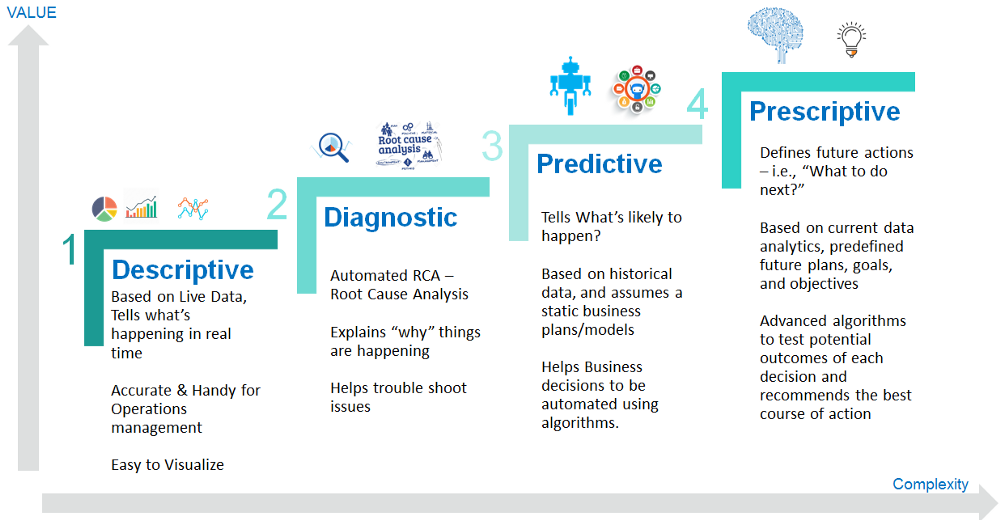

Conforme apresentada na Figura acima temos quatro tipos principais de análise de dados e esse trabalho será concentrado em realizar uma análise descritiva dos dados e também realizar técnicas de análise e visualização fazer um diagnóstico dos dados.

Logo, os principais objetivos são: 

## 2.2.Objetivos

a) Práticas os métodos e técnicas que foram apresentas durante as aulas, conforme os pontos destacados:
- Descrição dos Dados: Identifique o número de observações (N), preditores (D), classes (L) e a distribuição das classes no conjunto de dados.

- Análise Univariada: Realize uma análise dos preditores individualmente, incluindo histogramas, box-plots e cálculo de média, desvio padrão e assimetria para cada variável.

- Análise Univariada Condicional: Repita a análise univariada, mas separada por classes, e calcule as estatísticas para cada classe, observando padrões discriminatórios.

- Análise Bivariada: Explore as relações entre pares de preditores por meio de scatter plots e calcule os coeficientes de correlação para identificar dependências lineares ou não lineares.

- Análise Multivariada (PCA): Realize uma análise de componentes principais para reduzir a dimensionalidade e visualize a separação das classes nas duas primeiras componentes principais.

## 3.Construction of the Data Dictionary (Descrição dos Dados)


Nessa primeira etapa é muito importante mapeamos os nossos dados, primeiro para conhecer cada um e identificar qual característica ou informação aquele dado expressa. Esse dicionário também se rá importante para conferimos o tipo de dados se estar corretamente especificado, e será importante para consultamos essas informações no decorrer do projeto, para, por exemplo, dividimos os dados em categorias e realizar analises com base no tipo do dado.

Organização e Padronização: O dicionário de dados descreve as variáveis, suas definições, tipos de dados, unidades e restrições. Essa documentação organiza os dados e garante que todos entendam o que cada campo representa, evitando ambiguidade.

Escalabilidade: Se o projeto for expandido no futuro, o dicionário de dados ajuda a integrar novos dados ou variáveis de forma estruturada e a garantir que a base existente seja preservada.

Facilita a Colaboração: Um dicionário de dados é uma referência para todos os envolvidos no projeto (equipe de TI, analistas, usuários finais). Isso torna mais fácil para novos membros da equipe entenderem rapidamente a estrutura dos dados.

Documentação e Auditoria: Em projetos de longo prazo, o dicionário de dados serve como um registro que documenta todas as variáveis e suas modificações. Isso é importante para auditorias, para rastrear a origem e a finalidade dos dados e entender mudanças feitas ao longo do tempo.


In [6]:
data_dict = pd.DataFrame([
    {
       "variavel" : "OSEBuildingID",
       "descricao-pt": "Um identificador exclusivo atribuído a cada propriedade coberta pela Portaria de Referência de Seattle para fins de rastreamento e identificação.",
       "descricao-en": "A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"
    },
    {
       "variavel" : "DataYear",
       "descricao-pt": "Ano civil (janeiro-dezembro) representado por cada registro de dados.",
       "descricao-en": "Calendar year (January-December) represented by each data record.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"   
    },
    {
       "variavel" : "BuildingName",
       "descricao-pt": "Nome oficial ou comum da propriedade registrado na cidade de Seattle.",
       "descricao-en": "Official or common property name on record with the City of Seattle.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "BuildingType",
       "descricao-pt": "Classificação de tipo de edifício de alto nível da cidade de Seattle.",
       "descricao-en": "City of Seattle high level building type classification.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "TaxParcelIdentificationNumber",
       "descricao-pt": "Identificador único para a parcela de imposto do edifício.",
       "descricao-en": "Unique identifier for the building’s tax parcel.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"
    },
    {
       "variavel" : "Address",
       "descricao-pt": "Endereço do edifício.",
       "descricao-en": "Street address of the building.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "City",
       "descricao-pt": "Cidade onde o edifício está localizado.",
       "descricao-en": "City where the building is located.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "State",
       "descricao-pt": "Sigla do estado onde o edifício está localizado.",
       "descricao-en": "State abbreviation where the building is located.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "ZipCode",
       "descricao-pt": "Código postal do local do edifício.",
       "descricao-en": "State abbreviation where the building is located.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"
    },
    {
       "variavel" : "Latitude",
       "descricao-pt": "Coordenada de latitude da localização do edifício.",
       "descricao-en": "Latitude coordinate of the building location.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "Longitude",
       "descricao-pt": "Coordenada longitudinais da localização do edifício.",
       "descricao-en": "Longitude coordinate of the building location.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "Neighborhood",
       "descricao-pt": "Área de vizinhança da propriedade definida pelo Departamento de Bairros da Cidade de Seattle.",
       "descricao-en": "Property neighborhood area defined by the City of Seattle Department of Neighborhoods.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "CouncilDistrictCode",
       "descricao-pt": "Propriedade do distrito do conselho da cidade de Seattle.",
       "descricao-en": "Property City of Seattle council district.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"
    },
    {
       "variavel" : "YearBuilt",
       "descricao-pt": "Ano em que um imóvel foi construído.",
       "descricao-en": "Year in which a property was constructed.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"
    },
    {
       "variavel" : "NumberofFloors",
       "descricao-pt": "Número total de andares do edifício.",
       "descricao-en": "Total number of floors in the building.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"
    },
    {
       "variavel" : "PropertyGFATotal",
       "descricao-pt": "Área bruta total do edifício e do estacionamento.",
       "descricao-en": "Total building and parking gross floor area.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "PropertyGFABuilding(s)",
       "descricao-pt": "Área total do piso em pés quadrados entre as superfícies externas das paredes de fechamento de um edifício. Isso inclui todas as áreas dentro do(s) edifício(s), como espaço para inquilinos, áreas comuns, escadas, porões, armazenamento, etc...",
       "descricao-en": "Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc...",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "PropertyGFAParking",
       "descricao-pt": "Espaço total em metros quadrados de todos os tipos de estacionamento (totalmente fechado, parcialmente fechado e aberto).",
       "descricao-en": "Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open).",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "PrimaryPropertyType",
       "descricao-pt": "Qual a função primária da propriedade",
       "descricao-en": "What is the primary function of the property",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "ENERGYSTARScore",
       "descricao-pt": "Uma classificação de 1-100 calculada pela EPA que avalia o desempenho energético geral de uma propriedade, com base em dados nacionais para controlar as diferenças entre clima, usos de edifícios e operações. Uma pontuação de 50 representa a mediana nacional",
       "descricao-en": "An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SiteEUIWN(kBtu/sf)",
       "descricao-pt": "A Intensidade de Uso de Energia do Local (EUI) Normalizada pelo Clima (WN) é a Energia do Local WN de uma propriedade dividida por sua área bruta de piso (em pés quadrados). A Energia do Local WN é o Uso de Energia do Local que a propriedade teria consumido durante as condições climáticas médias de 30 anos. A EUI do Local WN é medida em milhares de unidades térmicas britânicas (kBtu) por pé quadrado.",
       "descricao-en": "Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SiteEUI(kBtu/sf)",
       "descricao-pt": "A Intensidade de Uso de Energia do Local (EUI) é o Uso de Energia do Local de uma propriedade dividido por sua área bruta de piso. O Uso de Energia do Local é a quantidade anual de toda a energia consumida pela propriedade no local, conforme relatado nas contas de serviços públicos. O EUI do Local é medido em milhares de unidades térmicas britânicas (kBtu) por pé quadrado.",
       "descricao-en": "Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SiteEnergyUse(kBtu)",
       "descricao-pt": "A quantidade anual de energia consumida pela propriedade de todas as fontes de energia.",
       "descricao-en": "The annual amount of energy consumed by the property from all sources of energy.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SiteEnergyUseWN(kBtu)",
       "descricao-pt": "A quantidade anual de energia consumida pela propriedade de todas as fontes de energia, ajustada ao que a propriedade teria consumido durante as condições climáticas médias de 30 anos.",
       "descricao-en": "The annual amount of energy consumed by the property from all sources of energy, adjusted to what the property would have consumed during 30-year average weather conditions.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SourceEUIWN(kBtu/sf)",
       "descricao-pt": "A Intensidade de Uso de Energia de Fonte (EUI) Normalizada pelo Clima (WN) é a Energia de Fonte WN de uma propriedade dividida por sua área bruta de piso. A Energia de Fonte WN é o Uso de Energia de Fonte que a propriedade teria consumido durante as condições climáticas médias de 30 anos. A EUI de Fonte WN é medida em milhares de unidades térmicas britânicas (kBtu) por pé quadrado.",
       "descricao-en": "Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SourceEUI(kBtu/sf)",
       "descricao-pt": "Intensidade de Uso de Energia de Fonte (EUI) é o Uso de Energia de Fonte de uma propriedade dividido por sua área bruta de piso. Uso de Energia de Fonte é a energia anual usada para operar a propriedade, incluindo perdas de geração, transmissão e distribuição. EUI de Fonte é medido em milhares de unidades térmicas britânicas (kBtu) por pé quadrado.",
       "descricao-en": "Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "LargestPropertyUseType",
       "descricao-pt": "Tipo de uso primário da maior área do edifício.",
       "descricao-en": "Primary use type of the largest area in the building.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "LargestPropertyUseTypeGFA",
       "descricao-pt": "Área bruta do maior tipo de uso da propriedade.",
       "descricao-en": "Gross floor area of the largest property use type.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SecondLargestPropertyUseType",
       "descricao-pt": "Tipo de uso secundário da segunda maior área do edifício.",
       "descricao-en": "Secondary use type of the second largest area in the building.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "SecondLargestPropertyUseTypeGFA",
       "descricao-pt": "Área bruta do segundo maior tipo de uso da propriedade.",
       "descricao-en": "Gross floor area of the second largest property use type.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "ThirdLargestPropertyUseType",
       "descricao-pt": "Terceiro tipo de uso no edifício por área",
       "descricao-en": "Third use type in the building by area.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "ThirdLargestPropertyUseTypeGFA",
       "descricao-pt": "Área bruta do terceiro maior tipo de uso da propriedade.",
       "descricao-en": "Gross floor area of the third largest property use type.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "Electricity(kWh)",
       "descricao-pt": "A quantidade anual de eletricidade consumida pela propriedade no local, incluindo eletricidade comprada da rede e gerada por sistemas renováveis ​​no local, medida em kWh.",
       "descricao-en": "The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SteamUse(kBtu)",
       "descricao-pt": "Consumo anual de vapor em kBtu.",
       "descricao-en": "Annual steam usage in kBtu.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "NaturalGas(therms)",
       "descricao-pt": "A quantidade anual de gás natural fornecido pela concessionária consumido pela propriedade, medida em termos.",
       "descricao-en": "The annual amount of utility-supplied natural gas consumed by the property, measured in therms.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "EPAPropertyType",
       "descricao-pt": "Classificação do tipo de propriedade da EPA para o edifício.",
       "descricao-en": "EPA property type classification for the building.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "ComplianceStatus",
       "descricao-pt": "Se uma propriedade atendeu aos requisitos de referência de energia para o ano de relatório atual.",
       "descricao-en": "Whether a property has met energy benchmarking requirements for the current reporting year.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "ComplianceIssue",
       "descricao-pt": "Caso não esteja em conformidade, qual problema o edifício apresentou em 15 de novembro de 2021.",
       "descricao-en": "If not compliant, what issue the building had as of November 15, 2021.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "Electricity(kBtu)",
       "descricao-pt": "A quantidade anual de eletricidade consumida pela propriedade no local, incluindo eletricidade comprada da rede e gerada por sistemas renováveis ​​no local, medida em milhares de unidades térmicas britânicas (kBtu).",
       "descricao-en": "The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "NaturalGas(kBtu)",
       "descricao-pt": "A quantidade anual de gás natural fornecido pela concessionária consumido pela propriedade, medida em milhares de unidades térmicas britânicas (kBtu).",
       "descricao-en": "The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu).",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "TotalGHGEmissions",
       "descricao-pt": "A quantidade total de emissões de gases de efeito estufa, incluindo dióxido de carbono, metano e gases de óxido nitroso liberados na atmosfera como resultado do consumo de energia na propriedade, medido em toneladas métricas de dióxido de carbono equivalente. Este cálculo usa um fator de emissões de GEE do portfólio de recursos de geração da Seattle CIty Light.",
       "descricao-en": "The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "GHGEmissionsIntensity",
       "descricao-pt": "Total de Emissões de Gases de Efeito Estufa dividido pela área bruta do piso da propriedade, medida em quilogramas de dióxido de carbono equivalente por pé quadrado. Este cálculo usa um fator de emissões de GEE do portfólio de recursos de geração da Seattle City Light.",
       "descricao-en": "Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "NumberofBuildings",
       "descricao-pt": "Número total de estruturas na propriedade.",
       "descricao-en": "Total number of structures on the property.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"
    }
])

In [7]:
# apresentação do dicionário
display(data_dict.shape)

(43, 5)

## 4. Conclusion

In [8]:
# Contando o número de colunas de tipo string ou categoria
num_strings = sum((df_raw_seattle.dtypes == 'object') | (df_raw_seattle.dtypes == 'category'))

# Contando o número de colunas numéricas
num_numeric = sum((df_raw_seattle.dtypes == 'int64') | (df_raw_seattle.dtypes == 'float64'))

# Obtendo os nomes das colunas que são strings ou categóricas
string_columns = df_raw_seattle.select_dtypes(include=['object', 'category']).columns

print(f"Número de colunas de string ou categoria: {num_strings}")
print(f"Número de colunas numéricas: {num_numeric}")
print("Colunas de string ou categoria:", list(string_columns))

Número de colunas de string ou categoria: 14
Número de colunas numéricas: 29
Colunas de string ou categoria: ['BuildingName', 'BuildingType', 'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'Neighborhood', 'PrimaryPropertyType', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'EPAPropertyType', 'ComplianceStatus', 'ComplianceIssue']


In [9]:
df_raw_seattle.shape

(14525, 43)

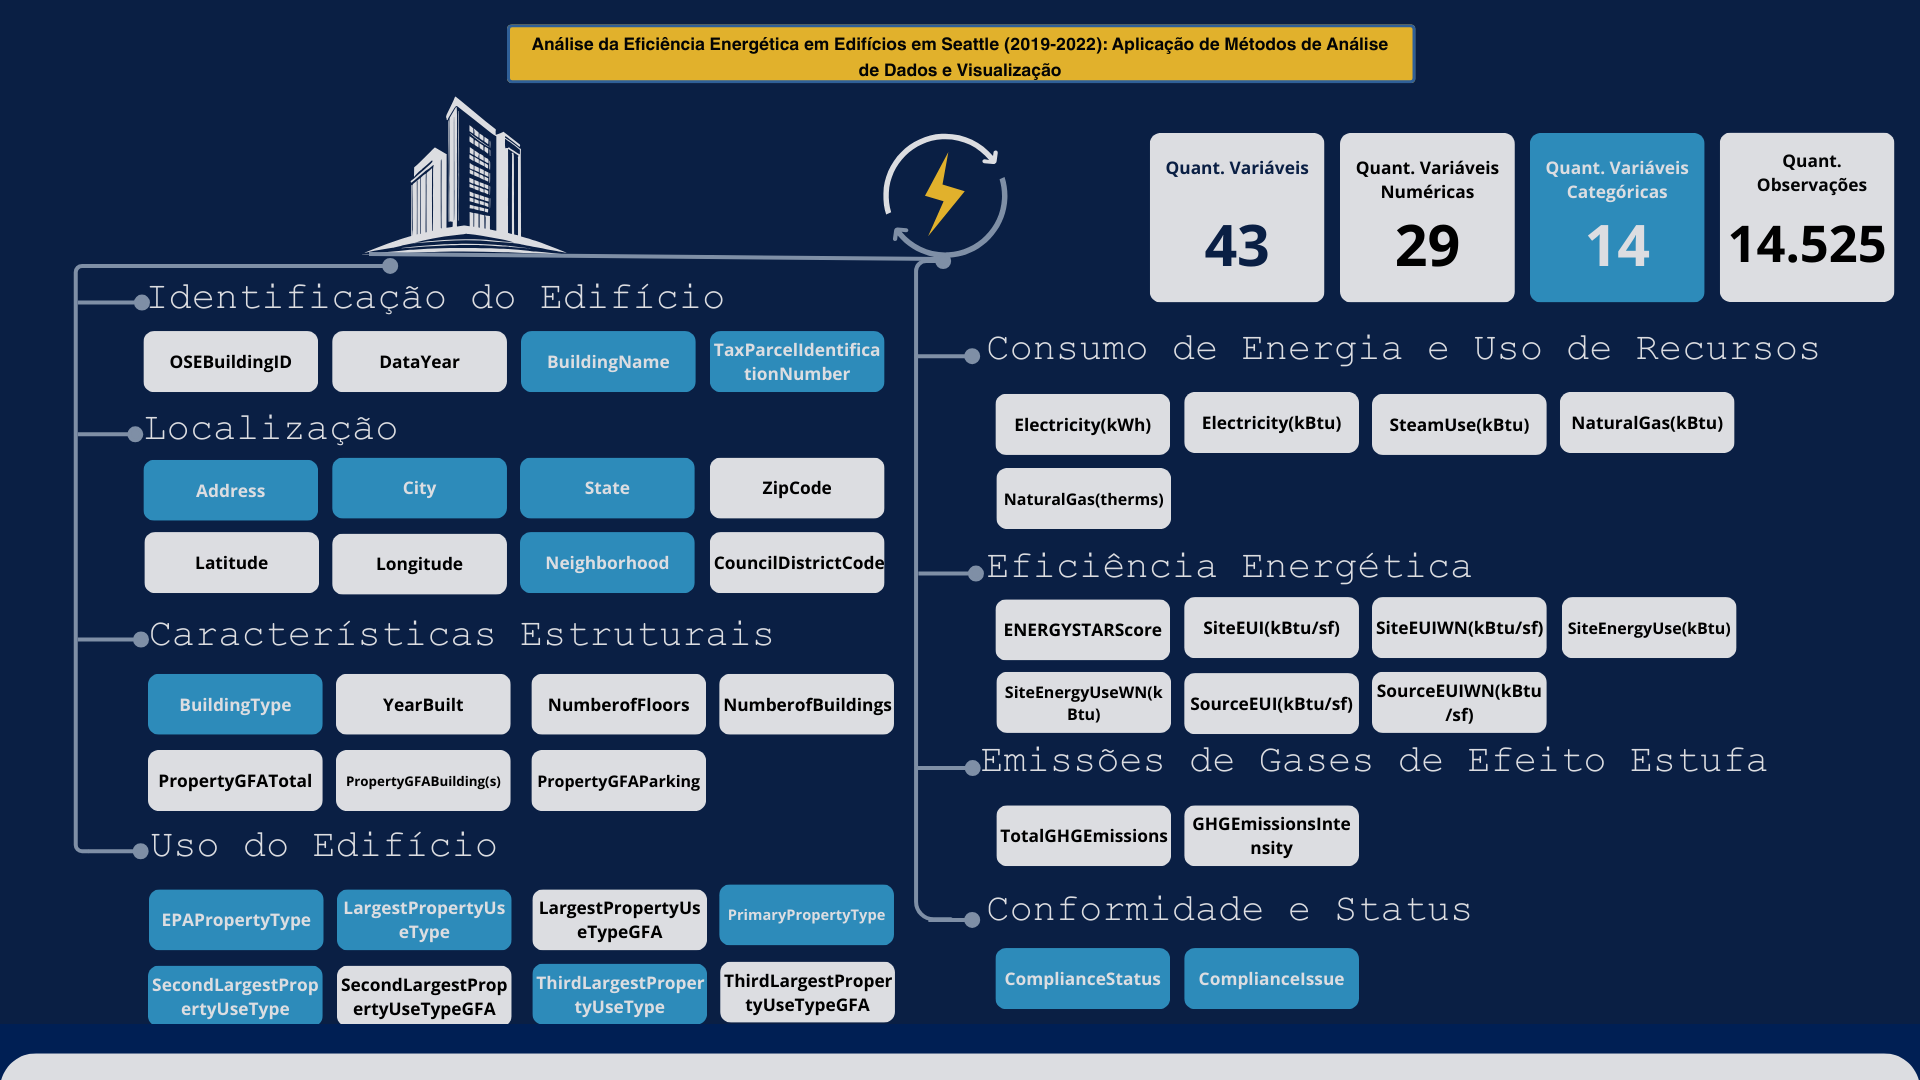

## 5. Exporting the Results

In [10]:
# path to save files
path_df = r'C:\Users\Yago\Desktop\GitHubLocal\UFC\ComputationalIntelligence\HW1\5.pre_processing\df_raw_seattle.csv'
path_data_dict =  r'C:\Users\Yago\Desktop\GitHubLocal\UFC\ComputationalIntelligence\HW1\5.pre_processing\data_dict_total.csv'

# export the Dataframe to csv:
df_raw_seattle.to_csv(path_df, index = False)

# export the Dicionary to csv:
data_dict.to_csv(path_data_dict, index = False)

# export the Dicionary to json:
#with open(path_json, 'w', encoding='utf-8') as f:
#    json.dump(data_dict, f, ensure_ascii=False, indent=4)

print("Arquivos exportados com sucesso!")


Arquivos exportados com sucesso!


## References

[1] Seattle.gov, "2019 Building Energy Benchmarking", City of Seattle. [Online]. Disponível: https://data.seattle.gov/Built-Environment/2019-Building-Energy-Benchmarking/3th6-ticf/about_data. [Acessado: 10 de novembro de 2024].

[2] Seattle.gov, "2020 Building Energy Benchmarking", City of Seattle. [Online]. Disponível: https://data.seattle.gov/Built-Environment/2020-Building-Energy-Benchmarking/auez-gz8p/about_data. [Acessado: 10 de novembro de 2024].

[3] Seattle.gov, "2021 Building Energy Benchmarking", City of Seattle. [Online]. Disponível: https://data.seattle.gov/Built-Environment/2021-Building-Energy-Benchmarking/bfsh-nrm6/about_data. [Acessado: 10 de novembro de 2024].

[4] Seattle.gov, "2022 Building Energy Benchmarking", City of Seattle. [Online]. Disponível: https://data.seattle.gov/Built-Environment/2022-Building-Energy-Benchmarking/5sxi-iyiy/about_data. [Acessado: 10 de novembro de 2024].

[5] Seattle.gov, "Office of Sustainability & Environment", City of Seattle. [Online]. Disponível: https://www.seattle.gov/environment/climate-change/buildings-and-energy/energy-benchmarking. [Acessado: 12 de novembro de 2024].

[6] Seattle.gov, "Seattle Energy Benchmarking Ordinance", City of Seattle. [Online]. Disponível: https://energyfave.com/energy-benchmarking-compliance/seattle-energy-benchmarking/#:~:text=Through%20benchmarking%2C%20building%20owners%20and,emissions%2C%20and%20generate%20cost%20savings. [Acessado: 12 de novembro de 2024].